In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.shape

(10000, 3)

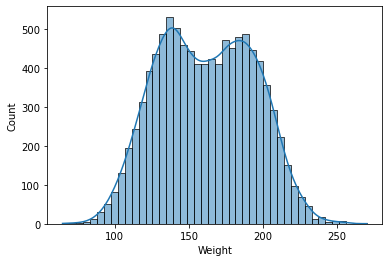

In [7]:
sns.histplot(df['Weight'], kde=True)

In [8]:
mean_value = df['Weight'].mean()
mean_value

161.44035683283076

In [9]:
std_value = df['Weight'].std()
std_value

32.108439006519546

In [18]:
std_plus3 = mean_value + (3 * std_value)
std_plus3

257.7656738523894

In [21]:
neg_std3 = mean_value - ( 3 * std_value)
neg_std3

65.11503981327212

In [22]:
df[df['Weight'] > std_plus3] #outlier

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [23]:
df[df['Weight'] < neg_std3] #outlier

,Gender,Height,Weight
9285,Female,54.263133,64.700127


In [24]:
merge_outliers = df[(df['Weight'] > std_plus3) | (df['Weight'] < neg_std3)]   # Merge two type of outliers

In [25]:
merge_outliers

,Gender,Height,Weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


In [26]:
merge_outliers.shape

(2, 3)

In [27]:
remove_out_columns = df[(df['Weight'] < std_plus3) & (df['Weight'] > neg_std3)]  #drop all outliers

In [28]:
remove_out_columns

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [29]:
remove_out_columns.shape

(9998, 3)

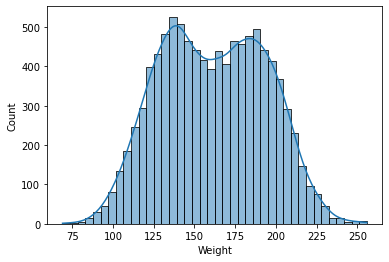

In [30]:
sns.histplot(remove_out_columns['Weight'], kde=True)

In [31]:
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first=True)  #true means it will drop one dummy variable
dummy_variables

,Male
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


In [32]:
new_df = remove_out_columns.drop('Gender',axis=1)

In [33]:
new_df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [34]:
df = pd.concat([new_df,dummy_variables], axis=1) #Concat two data frame

In [35]:
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [36]:
df.tail()

,Height,Weight,Male
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0
9999,61.944246,113.649103,0


In [37]:
x = df.drop('Height', axis=1)

In [38]:
y = df['Height']

In [39]:
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [40]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [43]:
xtrain.shape

(6998, 2)

In [44]:
xtest.shape

(3000, 2)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg  = LinearRegression()

In [47]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [48]:
reg.coef_ 

array([ 0.12307758, -0.99148292])

In [49]:
reg.intercept_

46.98654372848976

In [50]:
reg.predict(xtest)

array([70.1628629 , 67.85037173, 66.94501359, ..., 68.24803581,
       62.93872445, 70.96332948])

In [51]:
reg.predict(xtest).shape

(3000,)

In [52]:
pred = reg.predict(xtest)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
mean_squared_error(ytest, pred)

2.133724214923081

In [55]:
r2_score(ytest,pred)

0.8570480760433349

so, our model accuracy is 85.7